In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [100]:
data=pd.read_csv(r"C:\Users\Jayant\creditcard.csv")
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [101]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [102]:
data.shape

(284807, 31)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [104]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [105]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [106]:
#feature scaling
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [107]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [108]:
# drop time column
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [109]:
data.shape

(284807, 30)

In [110]:
#check duplicate values
data.duplicated().any()

True

In [111]:
#remove duplicate values
data = data.drop_duplicates()
data.shape

(275663, 30)

In [112]:
#distribution of legit transaction and fraudulant transaction
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

C:\Users\Jayant\AppData\Local\Temp\ipykernel_11796\2446532586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette=['#5975A4', '#CC8963'])


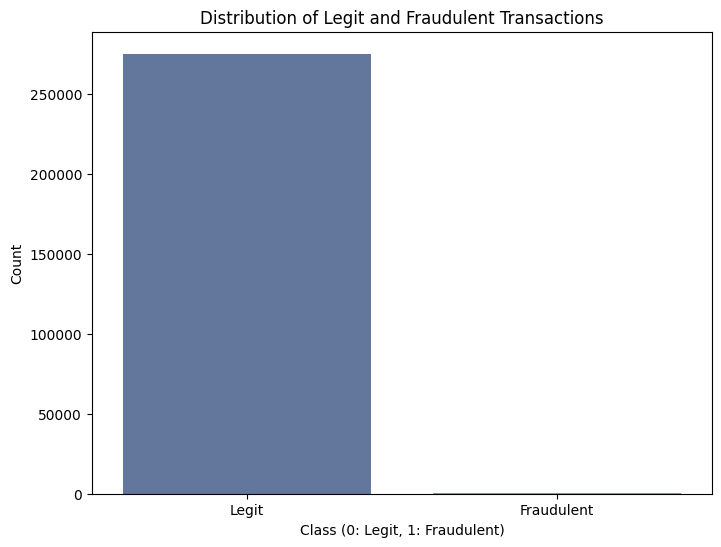

In [148]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, palette=['#5975A4', '#CC8963'])
plt.title('Distribution of Legit and Fraudulent Transactions')
plt.xlabel('Class (0: Legit, 1: Fraudulent)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Legit', 'Fraudulent'])
plt.show()

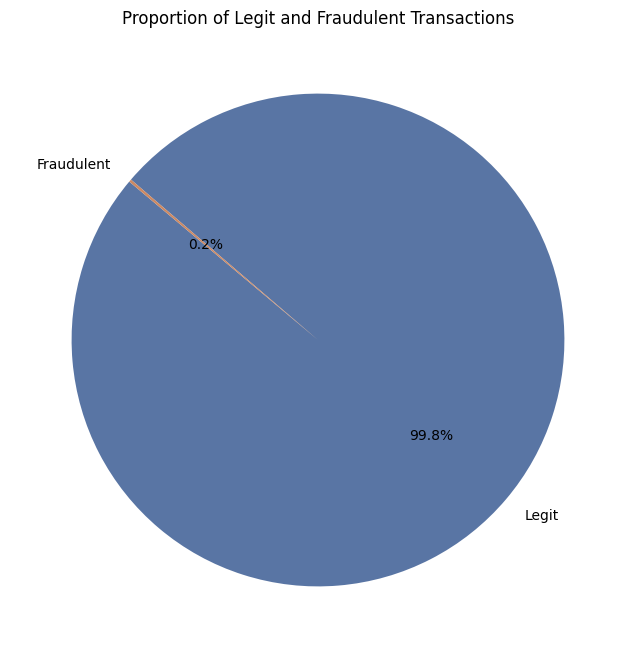

In [151]:
# proportion of different classes
plt.figure(figsize=(8, 8))
data['Class'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#5975A4', '#CC8963'], startangle=140, labels=['Legit', 'Fraudulent'])
plt.title('Proportion of Legit and Fraudulent Transactions')
plt.ylabel('')
plt.show()

In [153]:
#separating the data
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [154]:
print(legit.shape)
print(fraud.shape)

(275190, 30)
(473, 30)


In [155]:
# statistical measures of the data
legit.Amount.describe()

count    275190.000000
mean          0.008682
std           1.012309
min          -0.353229
25%          -0.327682
50%          -0.258275
75%          -0.033782
max         102.362243
Name: Amount, dtype: float64

In [156]:
fraud.Amount.describe()

count    473.000000
mean       0.142021
std        1.040346
min       -0.353229
25%       -0.349231
50%       -0.313968
75%        0.070128
max        8.146182
Name: Amount, dtype: float64

In [157]:
#undersampling
legit_sample = legit.sample(n=473)

In [158]:
New_data = pd.concat([legit_sample, fraud], axis=0)

In [159]:
New_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169980,-1.205757,1.003660,2.539363,4.432751,-0.494887,1.619804,-0.871982,1.043636,-1.371538,1.105317,...,0.290982,0.628443,-0.078698,0.649926,0.018882,0.533283,0.259046,0.060027,-0.100790,0
128595,-0.790400,1.292283,1.205674,0.015911,-0.303629,-0.945834,0.393245,0.320583,-0.673837,-0.559890,...,-0.170360,-0.550797,0.036726,0.379662,-0.142657,0.070871,0.143649,0.053283,-0.317287,0
66418,1.165225,-0.015947,0.354370,0.309655,-0.225197,-0.035246,-0.199684,0.173079,0.001352,0.061141,...,-0.298233,-0.976663,0.180184,-0.342652,0.000103,0.136585,-0.034587,0.003221,-0.277945,0
234671,0.136499,0.943086,-0.622724,-0.780154,1.187768,-0.199665,0.863013,0.084576,-0.229943,-0.661319,...,-0.326244,-0.845288,0.030549,-0.020776,-0.386432,0.129112,0.214377,0.068366,-0.320165,0
218601,1.921904,0.086733,-1.858047,0.563858,0.291535,-1.399863,0.467222,-0.482375,0.387891,-0.587781,...,0.241205,0.767458,-0.122773,-0.142858,0.290060,-0.106752,-0.006928,-0.014340,-0.037381,0


In [160]:
New_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [161]:
#Splitting the data into Features & Targets
X = New_data.drop(columns='Class', axis=1)
Y = New_data['Class']

In [162]:
print(X)

              V1        V2        V3        V4        V5        V6        V7  \
169980 -1.205757  1.003660  2.539363  4.432751 -0.494887  1.619804 -0.871982   
128595 -0.790400  1.292283  1.205674  0.015911 -0.303629 -0.945834  0.393245   
66418   1.165225 -0.015947  0.354370  0.309655 -0.225197 -0.035246 -0.199684   
234671  0.136499  0.943086 -0.622724 -0.780154  1.187768 -0.199665  0.863013   
218601  1.921904  0.086733 -1.858047  0.563858  0.291535 -1.399863  0.467222   
...          ...       ...       ...       ...       ...       ...       ...   
279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
280149 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
281674  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

              V8        V9       V10  .

In [163]:
print(Y)

169980    0
128595    0
66418     0
234671    0
218601    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


In [164]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [165]:
#model traning using logistic regression
model = LogisticRegression()

In [166]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [167]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9497354497354498


In [168]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9315789473684211


In [169]:
# precision on training data
X_test_prediction = model.predict(X_test)
training_data_precision = precision_score(Y_train, X_train_prediction)
print('Precision on Training data : ', training_data_precision)


Precision on Training data :  0.980225988700565


In [170]:
# precision on Test data
X_test_prediction = model.predict(X_test)
test_data_precision = precision_score(X_test_prediction, Y_test)
print('Precision score on Test Data : ', test_data_precision)

Precision score on Test Data :  0.9263157894736842


In [171]:
#recall on training data
training_data_recall = recall_score(Y_train, X_train_prediction)
print('Recall score on Training Data : ', training_data_recall)


Recall score on Training Data :  0.917989417989418


In [172]:
#recall on test data
test_data_recall = recall_score(X_test_prediction, Y_test)
print('Recall score on Test Data : ', test_data_recall)

Recall score on Test Data :  0.9361702127659575


In [173]:
#F1-Score on training data
training_data_f1 = f1_score(Y_train, X_train_prediction)
print('F1-Score score on Training Data : ', training_data_f1)

F1-Score score on Training Data :  0.9480874316939891


In [174]:
#F1-Score on test data
test_data_f1 =  f1_score(X_test_prediction, Y_test)
print('F1-Score on Test Data : ', test_data_f1)

F1-Score on Test Data :  0.9312169312169312


In [175]:
#training the Random forest classifier Model with Training Data
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [176]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [177]:
#Make predictions on testing data
y_pred = model.predict(X_test)


In [178]:
# accuracy on test data
testing_data_accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy on Test data:', testing_data_accuracy)

Accuracy on Test data: 0.9263157894736842


In [179]:
#precision on training data
training_data_precision = precision_score(Y_train, X_train_prediction)
print('Precision on Training data:', training_data_precision)

Precision on Training data: 1.0


In [180]:
#precision on test data
testing_data_precision = precision_score(Y_test, y_pred)
print('Precision on Test data:', testing_data_precision)

Precision on Test data: 0.945054945054945


In [181]:
#recall on training data
training_data_recall = recall_score(Y_train, X_train_prediction)
print('Recall on Training data:', training_data_recall)

Recall on Training data: 1.0


In [182]:
#recall on test data
testing_data_recall = recall_score(Y_test, y_pred)
print('Recall on Test data:', testing_data_recall)

Recall on Test data: 0.9052631578947369


In [183]:
#F1-Score on training data
training_data_f1 = f1_score(Y_train, X_train_prediction)
print('F1 Score on Training data:', training_data_f1)

F1 Score on Training data: 1.0


In [184]:
#F1-Score on test data
testing_data_f1 = f1_score(Y_test, y_pred)
print('F1 Score on Test data:', testing_data_f1)

F1 Score on Test data: 0.9247311827956989
